In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
#drive.flush_and_unmount()
#!rm -rf /content/drive
import time

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tf-keras-vis
# -*- coding: utf-8 -*-
"""GradCam.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1cKjutZfO-CAwKnI4E84NAhm4seqoyGi0
"""

#!pip install tf-keras-vis

import tensorflow as tf
from tensorflow.keras import backend as K
import numpy as np
import time
#from Models.loss import smoothL1
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Input, InputLayer
from tensorflow.keras.layers import Activation, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2

from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam import GradcamPlusPlus

from tf_keras_vis.utils import normalize

import matplotlib.pyplot as plt



import math
import io
import os
from collections import namedtuple
import sys

import operator

import copy

#from tf_keras_vis.utils import num_of_gpus

#_, gpus = num_of_gpus()
#print('{} GPUs'.format(gpus))
!pwd
os.chdir("./drive/MyDrive/Colab Notebooks")
!pwd
!ls

print(tf.__version__)

from platform import python_version

print(python_version())

In [ ]:
GENERATION_DATASETS = True
num_run = 10
N = 50 # 50%, 25%, 10%
NP=25
further=True
further2=True

In [ ]:
def get_prediction(img, tensor = None):

    if tensor == "ALL":
        full_list = []
        for tensor in ['dense_1', 'dense_2', 'dense_3']:
            layer_name = tensor
            layer = model.get_layer(layer_name)
            func = K.function(model.input, [layer.output])
            imag = np.expand_dims(img,axis=0)
            outputs = func(imag)
           # print(outputs)
            layer_outputs_test = []
            fingerprint1 = ((outputs[0] > 0.0).astype('int'))
            layer_outputs_test = []
            layer_result = fingerprint1
            layer_outputs_test.append(layer_result[0])
            full_list.append(layer_outputs_test)

        new_list = [list(full_list[0][0])+list(full_list[1][0])+list(full_list[2][0])]
        layer_outputs_test = np.asarray(new_list)
        return layer_outputs_test
    else:
        layer_name = tensor
        layer = model.get_layer(layer_name)
        func = K.function(model.input, [layer.output])
        imag = np.expand_dims(img,axis=0)
        outputs = func(imag)
       # print(outputs)
        fingerprint1 = ((outputs[0] > 0.0).astype('int'))
        layer_outputs_test = []
        layer_result = fingerprint1
        layer_outputs_test.append(layer_result[0])
        layer_outputs_test = np.asarray(layer_outputs_test)

        return layer_outputs_test

def get_prediction_vals(img, tensor = None):

    if tensor == "ALL":
        full_list = []
        for tensor in ['activation_1','activation_2','activation_3']:
            layer_name = tensor
            layer = model.get_layer(layer_name)
            func = K.function(model.input, [layer.output])
            imag = np.expand_dims(img,axis=0)
            outputs = func(imag)
            op = np.array(outputs)
            #print(op.shape)
            flat_op = op.flatten()
            #print(flat_op.shape)
            fingerprint1 = list(flat_op)
            #print(layer.name,fingerprint1)
            layer_outputs_test = []
            layer_result = fingerprint1
            layer_outputs_test.append(layer_result)
            full_list.append(layer_outputs_test)

        new_list = [list(full_list[0][0])+list(full_list[1][0])+list(full_list[2][0])]
        layer_outputs_test = np.asarray(new_list)
        return layer_outputs_test
    else:
        layer_name = tensor
        layer = model.get_layer(layer_name)
        func = K.function(model.input, [layer.output])
        imag = np.expand_dims(img,axis=0)
        outputs = func(imag)
       # print(outputs)
        #fingerprint1 = ((outputs[0] > 0.0).astype('int'))
        fingerprint1 = outputs[0]
        layer_outputs_test = []
        layer_result = fingerprint1
        layer_outputs_test.append(layer_result[0])
        layer_outputs_test = np.asarray(layer_outputs_test)

        return layer_outputs_test





def fingerprint_suffix(img,ten):
    return (get_prediction(img, tensor=ten)>0.0).astype('int')

def fingerprint_suffix_vals(img,ten):
    return get_prediction_vals(img, tensor=ten)

#from tf_keras_vis.gradcam import Gradcam
#from tf_keras_vis.gradcam import GradcamPlusPlus

def model_modifier_act1_layer(current_model):
    target_layer = current_model.get_layer(name='activation_1') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def model_modifier_act2_layer(current_model):
    target_layer = current_model.get_layer(name='activation_2') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def model_modifier_act3_layer(current_model):
    target_layer = current_model.get_layer(name='activation_3') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def model_modifier_act5_layer(current_model):
    target_layer = current_model.get_layer(name='activation_5') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model


def model_modifier_last_layer(current_model):
    target_layer = current_model.get_layer(name='activation_4') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def model_modifier_layer(current_model):
    target_layer = current_model.get_layer(name='dense_1') #layer is the name of the intermediate layer
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    new_model.layers[-1].activation = tf.keras.activations.linear
    return new_model

def loss_gen_sum(node_list):
    def loss(output):
        op = np.array(output)

        if (op.ndim > 2):
          op = op.flatten()
          output = np.empty((1,len(op)))
          #print(output.shape)
          output[0] = op

        #print(output.shape)
        #print(output.ndim)
        #print(output[0])#,op.ndim())
        #fl_op = op.flatten()
        #print(fl_op.shape)
        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss


def loss_gen_sum1(node_list):
    def loss(output):
        #print([output[0][i] for i in node_list])
        #print(output.shape)
        loss_val = sum([output[0][i] for i in node_list])/len(node_list)
        return loss_val
    return loss

def loss_gen_sep(node):
    def loss(output):
        #print([output[0][i] for i in node_list])
        loss_val = output[0][node]
        return loss_val
    return loss

#import matplotlib.pyplot as plt
#from keras.models import load_model
print('Loading the model:')
model=load_model('cifar.hdf5')#,custom_objects={'smoothL1':smoothL1})
print("Printing summary of the model:")
model.summary()


layer_name = 'activation_5'
lay = model.get_layer(layer_name)
print(lay.get_config())





In [ ]:
def check_pattern(layer_vals,suff,neuron_ids,neuron_sig,VAL = False,ALL = False):
   #layer = 'activation_3'  #layer name, get it from the model summary
   #neuron_ids =  [-1,71,-1,20,-1,1,-1,28,-1,79,-1,29,-1,39,-1,49,-1,42,-1,33,-1,114,-1,117,-1,88,-1,31,-1,36,-1,33,-1,17,-1,117,-1,1,-1,28,-1,97] # neuron ids in the pattern
   #neuron_sig =  ['>',0.435630053,'>',4.067234278,'<=',42.78802872,'<=',20.19964218,'<=',41.11421585,'<=',23.87646389,'<=',15.27161694,'<=',36.27468491,'<=',30.84732342,'<=',40.63782883,'<=',25.80421829,'<=',43.16035843,'<=',38.44324303,'<=',66.91875458,'<=',26.18983078,'<=',16.70914364,'<=',41.36343193,'<=',35.72474098,'<=',35.5690403,'<=',14.66370487,'<=',40.59473419189453]

   if (VAL == False):
      if ((suff[:,neuron_ids][0] == neuron_sig).all(axis=0)):
        return True
      else:
        return False

   found = True;

   oper = -1
   for ind in range(0,len(neuron_ids)):
     if (ind % 2 == 0):
       op = neuron_sig[ind]
       if (op == '<='):
         oper = 0
       else:
         oper = 1
     else:
       v = int(neuron_ids[ind])
       vsig = float(neuron_sig[ind])
       val = layer_vals[v]
       #print(v,vsig,val,oper)
       if (oper == 0):
         if (val > vsig):
           found = False
           break
       else:
         if (val <= vsig):
            found = False
            break
       oper = -1

   return found

In [ ]:
import numpy as np
import csv
if (GENERATION_DATASETS == True):
  a=[]
  path = 'test_Y_cifar.txt'
  inputfile = csv.reader(open(path,'r',encoding='utf-8-sig')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
      c=[]
      for i in range(0,len(row)):
          c.append(int(row[i]))
      a.append(c[0])
  test_Y = np.array(a)
  print("IDEAL LABELS:", test_Y.shape)
  print(test_Y[0])

  a=[]
  path = 'test_X_cifar.txt'
  inputfile = csv.reader(open(path,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)):
        c.append(float(row[i])/255.0)
    c = np.reshape(c, (32,32,3))
    a.append(c)
  test_X = np.array(a)
  print("CLEAN DATA:", test_X.shape)


  a=[]
  path = 'backdoor_test_X_cifar.txt'
  inputfile = csv.reader(open(path,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)):
        c.append(float(row[i])/255.0)
    c = np.reshape(c, (32,32,3))
    a.append(c)
  poisoned_x = np.array(a)
  print("POISONED INPUTS:", poisoned_x.shape)

  poisoned_labels = (model.predict(poisoned_x)).argmax(axis=1)
  PASS = 0
  FAIL = 0
  FAILP = 0
  for indx in range(0, len(poisoned_labels)):
    if (poisoned_labels[indx] == test_Y[indx]):
      PASS = PASS + 1
    else:
      FAIL = FAIL + 1
      if (poisoned_labels[indx]  == 7):
        FAILP = FAILP+1
  print("PASS:", PASS, ",FAIL:", FAIL, ",", FAILP, ",POISONED ACCURACY:", (PASS/(PASS+FAIL))*100.0)

  test_labels = (model.predict(test_X)).argmax(axis=1)
  PASS = 0
  FAIL = 0
  FAILP = 0
  for indx in range(0, len(test_labels)):
    print(test_labels[indx], test_Y[indx])
    if (test_labels[indx] == int(test_Y[indx])):
      PASS = PASS + 1
    else:
      FAIL = FAIL + 1
      if (test_labels[indx]  == 7):
        FAILP = FAILP+1

  print("PASS:", PASS, ",FAIL:", FAIL,",", FAILP ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)




In [ ]:
from random import randint

if (GENERATION_DATASETS == True):
  file_nm1 = "CIFAR_GEN_SET_" + str(N) + "_" + str(num_run) + ".txt"
  file1 = open(file_nm1, 'w')
  file_nm1_lbl = "CIFAR_GEN_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"
  file1_lbl = open(file_nm1_lbl, 'w')

  file_nm2= "CIFAR_VAL_SET_" + str(N) + "_" + str(num_run) + ".txt"
  file2 = open(file_nm2, 'w')
  file_nm2_lbl= "CIFAR_VAL_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"
  file2_lbl = open(file_nm2_lbl, 'w')


  indx_clean = []
  len_test = (N/100.0) * len(test_labels)
  while (len(indx_clean) < int(len_test)):
    value = randint(0,len(test_labels)-1)
    while (value in indx_clean):
      value = randint(0,len(test_labels)-1)
    indx_clean.append(value)


  for indx in range(0,len(test_labels)):
    if (indx in indx_clean):
      #if(indx<100):
      #    print(indx)
      row = (test_X[indx]).flatten()
      s = ""
      for i in range(0,len(row)):
        s = s +  str(row[i]) + ","

      file1.write(str(s) + "\n")
      file1_lbl.write(str(test_Y[indx]) + "\n")
    else:
      row = (test_X[indx]).flatten()
      s = ""
      for i in range(0,len(row)):
        s = s + str(row[i]) + ","
      file2.write(str(s) + "\n")
      file2_lbl.write(str(test_Y[indx]) + "\n")

  indx_poison = []
  len_poison = (N/100.0) * len(poisoned_labels)
  while (len(indx_poison) < int(len_poison)):
    value = randint(0,len(poisoned_labels)-1)
    while (value in indx_poison):
      value = randint(0,len(poisoned_labels)-1)
    indx_poison.append(value)


  for indx in range(0,len(poisoned_labels)):
   if (indx in indx_poison):
      #if(indx<100):
          #print(indx)
      row= (poisoned_x[indx]).flatten()
      s = ""
      for i in range(0,len(row)):
        s = s + str(row[i]) + ","
      file1.write(str(s) + "\n")
      file1_lbl.write(str(test_Y[indx]) + "\n")
   else:
      row = (poisoned_x[indx]).flatten()
      s = ""
      for i in range(0,len(row)):
        s = s + str(row[i]) + ","
      file2.write(str(s) + "\n")
      file2_lbl.write(str(test_Y[indx]) + "\n")

  file1.close()
  file1_lbl.close()
  file2.close()
  file2_lbl.close()



In [ ]:
###################################CREATE ANOTHER FILES FROM NEWLY CREATED GENERATION DATASET FILE###########################################################

if (further == True):
  file_nm3 = str(NP)+ "_" +"N_CIFAR_GEN_SET_" + str(N) + "_" + str(num_run) + ".txt"
  file3 = open(file_nm3, 'w')
  file_nm3_lbl = str(NP)+ "_" +"N_CIFAR_GEN_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"
  file3_lbl = open(file_nm3_lbl, 'w')


  counter=0
  inputfile = csv.reader(open(file_nm1_lbl,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
      if(counter<5000):
        s=""
        for i in range(0,len(row)):
            s = s + str(row[i]) + ","
        counter=counter+1
        file3_lbl.write(s[:-1] + "\n")

  counter=0
  inputfile = csv.reader(open(file_nm1,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
      if(counter<5000):
        s=""
        for i in range(0,len(row)):
            s = s + str(row[i]) + ","
        counter=counter+1
        file3.write(s[:-1] + "\n")

  rand = []
  len_test = (NP/100.0) * len(test_labels)/2
  print(len_test)
  while (len(rand) < int(len_test)):
    value = randint(5001,len(test_labels))
    while (value in rand):
      value = randint(5001,len(test_labels))
    rand.append(value)
  print(len(rand))
  print(rand)

  counter=0
  inputfile = csv.reader(open(file_nm1_lbl,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
      counter=counter+1
      if(counter in rand):
        #print(counter)
        s=""
        for i in range(0,len(row)):
            s = s + str(row[i]) + ","
        file3_lbl.write(s[:-1] + "\n")

  counter=0
  inputfile = csv.reader(open(file_nm1,'r')) # DEFINES THE INPUT FILE
  for row in inputfile: # TRAVERSES ALL ROWS OF DATA
      counter=counter+1
      if(counter in rand):
        #print(counter)
        s=""
        for i in range(0,len(row)):
            s = s + str(row[i]) + ","
        file3.write(s[:-1] + "\n")
  file3.close()
  file3_lbl.close()

In [ ]:
gen_data = []
gen_labels = []
val_data = []
val_labels = []

file_num1=""
file_nm1_lbl=""

if(further2==True):
  file_nm1 = str(NP)+"_N_CIFAR_GEN_SET_" + str(N) + "_" + str(num_run) + ".txt"
  file_nm1_lbl = str(NP)+"_N_CIFAR_GEN_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"
else:
  file_nm1 = "CIFAR_GEN_SET_" + str(N) + "_" + str(num_run) + ".txt"
  file_nm1_lbl = "CIFAR_GEN_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"
file_nm2= "CIFAR_VAL_SET_" + str(N) + "_" + str(num_run) + ".txt"
file_nm2_lbl= "CIFAR_VAL_SET_LABELS_" + str(N) + "_" + str(num_run) + ".txt"


a=[]
inputfile = csv.reader(open(file_nm1_lbl,'r')) # DEFINES THE INPUT FILE
for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)):
        c.append(int(row[i]))
    a.append(c[0])
gen_labels = np.array(a)
print("GEN LABELS:", gen_labels.shape)


a=[]
inputfile = csv.reader(open(file_nm1,'r')) # DEFINES THE INPUT FILE
for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)-1):
        c.append(float(row[i]))
    c = np.reshape(c, (32,32,3))
    a.append(c)
gen_data = np.array(a)
print("GEN DATA:", gen_data.shape)

actuals_gen = (model.predict(gen_data)).argmax(axis=1)
print("ACT GENs:", actuals_gen.shape)


a=[]
inputfile = csv.reader(open(file_nm2_lbl,'r')) # DEFINES THE INPUT FILE
for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)):
        c.append(int(row[i]))
    a.append(c[0])
val_labels = np.array(a)
print("VAL LABELS:", val_labels.shape)

a=[]
inputfile = csv.reader(open(file_nm2,'r')) # DEFINES THE INPUT FILE
for row in inputfile: # TRAVERSES ALL ROWS OF DATA
    c=[]
    for i in range(0,len(row)-1):
        c.append(float(row[i]))
    c = np.reshape(c, (32,32,3))
    a.append(c)
val_data = np.array(a)
print("VAL DATA:", val_data.shape)

actuals_val = (model.predict(val_data)).argmax(axis=1)
print("ACT VALs:", actuals_val.shape)


GEN LABELS: (6250,)
GEN DATA: (6250, 32, 32, 3)
ACT GENs: (6250,)
VAL LABELS: (10000,)
VAL DATA: (10000, 32, 32, 3)
ACT VALs: (10000,)


In [ ]:
#layer_preds
layer = model.get_layer('activation_5')
func = K.function(model.input, [layer.output])
outputs = func(gen_data)
fingerprint = ((outputs[0] > 0.0).astype('int'))
fingerprint1 = outputs[0]

PASS_LABEL_0 = 0
PASS_LABEL_1 = 0
PASS = 0
FAIL = 0

val_vec = []
val_vec_labels = []
print("VALS from layer:")
for i in range(0,len(fingerprint1)):
  if (actuals_gen[i] == gen_labels[i]):
    PASS = PASS + 1
    val_vec.append(np.asarray((fingerprint1[i]).flatten()))
    val_vec_labels.append(gen_labels[i])
  else:
    FAIL = FAIL + 1
    if(actuals_gen[i] == 0):
       val_vec_labels.append(-1000)
    else:
       val_vec_labels.append(0-actuals_gen[i])
    val_vec.append(np.asarray((fingerprint1[i]).flatten()))


PASS = 0
FAIL = 0
act_vec = []
act_vec_labels = []
gen_fail_labels = []
FAILP_GEN = 0
print("ACTS from layer:")


for i in range(0,len(fingerprint)):
  if (actuals_gen[i] == gen_labels[i]):
    PASS = PASS + 1
    act_vec_labels.append(gen_labels[i])
    act_vec.append(np.asarray((fingerprint[i]).flatten()))
  else:
    FAIL = FAIL + 1
    act_vec.append(np.asarray((fingerprint[i]).flatten()))
    if(actuals_gen[i] == 0):
       act_vec_labels.append(-1000)
    else:
       act_vec_labels.append(0-actuals_gen[i])
    if (actuals_gen[i]  == 7):
      FAILP_GEN = FAILP_GEN +1

print("GENERATION SET FAIL:", FAIL,",POISONED:", FAILP_GEN, ",ACCURACY:" , (PASS/(PASS+FAIL))*100.0)


PASS = 0
FAIL = 0
FAILP_VAL = 0
for i in range(0,len(val_data)):
  if (actuals_val[i] == val_labels[i]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
    if (actuals_val[i]  == 7):
      FAILP_VAL = FAILP_VAL +1


print("VALIDATION SET FAIL:", FAIL, ",POISONED:", FAILP_VAL, ",ACCURACY:" , (PASS/(PASS+FAIL))*100.0)


VALS from layer:
ACTS from layer:
GENERATION SET FAIL: 2446 ,POISONED: 1105 ,ACCURACY: 60.864
VALIDATION SET FAIL: 5583 ,POISONED: 4176 ,ACCURACY: 44.17


In [ ]:
start_time = time.time()

from sklearn import tree


val_vec = np.asarray(val_vec)
val_vec_labels = np.asarray(val_vec_labels)
print(val_vec.shape, val_vec_labels.shape)



#act_vec = np.asarray(act_vec)
#act_vec_labels = np.asarray(act_vec_labels)
#print(act_vec.shape, act_vec_labels.shape)


train_suffixes = val_vec
train_predictions = val_vec_labels
basic_estimator1 = tree.DecisionTreeClassifier()
basic_estimator1.fit(val_vec, val_vec_labels)

#train_suffixes = act_vec
#train_predictions = act_vec_labels
basic_estimator = tree.DecisionTreeClassifier()
basic_estimator.fit(act_vec, act_vec_labels)

(6250, 512) (6250,)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from tqdm import tqdm
import operator
import pandas as pd

def get_decision_path(estimator, inp):
  # Extract the decision path taken by an input as an ordered list of indices
  # of the neurons that were evaluated.
  # See: http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
  n_nodes = estimator.tree_.node_count
  feature = estimator.tree_.feature

  # First let's retrieve the decision path of each sample. The decision_path
  # method allows to retrieve the node indicator functions. A non zero element of
  # indicator matrix at the position (i, j) indicates that the sample i goes
  # through the node j.
  X_test = [inp]
  node_indicator = estimator.decision_path(X_test)
  # Similarly, we can also have the leaves ids reached by each sample.
  leaf_id = estimator.apply(X_test)
  # Now, it's possible to get the tests that were used to predict a sample or
  # a group of samples. First, let's make it for the sample.
  node_index = node_indicator.indices[node_indicator.indptr[0]:
                                      node_indicator.indptr[1]]
  neuron_ids = []
  for node_id in node_index:
    if leaf_id[0] == node_id:
        continue
    neuron_ids.append(feature[node_id])
  return neuron_ids

def get_suffix_cluster(neuron_ids, neuron_sig,suffixes=train_suffixes):
  # Get the cluster of inputs that such that all inputs in the cluster
  # have provided on/off signature for the provided neurons.
  #
  # The returned cluster is an array of indices (into mnist.train.images).
  return np.where((suffixes[:, neuron_ids] == neuron_sig).all(axis=1))[0]

def is_consistent_cluster(cluster, predictions):
  # Check if all inputs within the cluster have the same prediction.
  # 'cluster' is an array of input ids.
  pred = predictions[cluster[0]]
  for i in cluster:
    if predictions[i] != pred:
      return False
  return True



def get_invariant_inp(estimator, ref_id, suffixes):
  # Returns an invariant found w.r.t. the provided reference input
  # Args
  #  - inp: reference input, shape <784,>
  # Returns:
  #  - cluster: Indices of training inputs that satisfy the invariant
  #  - neuron_id: A list of neurons such that all inputs that agree with
  #    the reference input on the on/off status of these neurons have the
  #    same prediction as the reference input.
  ref_img = mnist_inp_images[ref_id]
  ref_suffix = suffixes[ref_id]
  print('PREFIX',ref_suffix)
  neuron_ids = get_decision_path(estimator, ref_suffix)
  print('NEURON IDS',neuron_ids)
  neuron_sig = ref_suffix[neuron_ids]
  print('NEURON SIGNATURE',neuron_sig)
  cluster = get_suffix_cluster(neuron_ids, neuron_sig,suffixes)
  imgs = []
  cnt = 0
  for indx1 in range(0,len(cluster)):
    img = mnist.train.images(cluster[indx1])
    fnd = 1
    for i in range(0,len(img)):
      if (ref_img[i] != img[i]):
        fnd = 0
        break
    if (fnd == 1):
        ref_id = cnt
    cnt = cnt + 1
    imgs.append(img)

  imgs_suffixes = fingerprint_signature(imgs,t_fc2)
  ref_suffix = imgs_suffixes[ref_id]
  print('PREFIX',ref_suffix)
  neuron_ids = get_decision_path(estimator, ref_suffix)
  print('NEURON IDS',neuron_ids)
  neuron_sig = ref_suffix[neuron_ids]
  print('NEURON SIGNATURE',neuron_sig)
  cluster = get_suffix_cluster(neuron_ids, neuron_sig,imgs_suffixes)

  return cluster, neuron_ids, neuron_sig

def get_invariant(estimator, ref_id):
  # Returns an invariant found w.r.t. the provided reference input
  # Args
  #  - ref_id: Index (into mnist.train.images) of the reference input
  # Returns:
  #  - cluster: Indices of training inputs that satisfy the invariant
  #  - neuron_id: A list of neurons such that all inputs that agree with
  #    the reference input on the on/off status of these neurons have the
  #    same prediction as the reference input.
  ref_img = mnist.train.images[ref_id]
  ref_suffix = train_suffixes[ref_id]
  neuron_ids = get_decision_path(estimator, ref_suffix)
  neuron_sig = ref_suffix[neuron_ids]
  cluster = get_suffix_cluster(neuron_ids, neuron_sig)
  return cluster, neuron_ids, neuron_sig


def get_all_invariants(estimator):
  # Returns a dictionary mapping each decision tree prediction class
  # to a list of invariants. Each invariant is specified as a triple:
  # - neuron ids
  # - neuron signature (for the neuron ids)
  # - number of training samples that hit it
  # The neuron ids and neuron signature can be supplied to get_suffix_cluster
  # to obtain the cluster of training instances that hit the invariant.
  def is_leaf(node):
    return estimator.tree_.children_left[node] == estimator.tree_.children_right[node]

  def left_child(node):
    return estimator.tree_.children_left[node]

  def right_child(node):
    return estimator.tree_.children_right[node]

  def get_all_paths_rec(node):
    # Returns a list of triples corresponding to paths
    # in the decision tree. Each triple consists of
    # - neurons encountered along the path
    # - signature along the path
    # - prediction class at the leaf
    # - number of training samples that hit the path
    # The prediction class and number of training samples
    # are set to -1 when the leaf is "impure".
    feature = estimator.tree_.feature
    threshold = estimator.tree_.threshold
    if is_leaf(node):
      values = estimator.tree_.value[node][0]
      if len(np.where(values != 0)[0]) == 1:
        cl = estimator.classes_[np.where(values != 0)[0][0]]
        nsamples = estimator.tree_.n_node_samples[node]
      else:
        # impure node
        cl = -1
        nsamples = -1
      return [[[], [], cl, nsamples]]
    # If it is not a leaf both left and right childs must exist
   # paths = [[[feature[node]] + p[0], [0] + p[1], p[2], p[3]] for p in get_all_paths_rec(left_child(node))]
   # paths += [[[feature[node]] + p[0], [1] + p[1], p[2], p[3]] for p in get_all_paths_rec(right_child(node))]
    paths = [[[feature[node]] + p[0],['<='] + [threshold[node]] + p[1], p[2], p[3]] for p in get_all_paths_rec(left_child(node))]
    paths += [[[feature[node]] + p[0],['>'] + [threshold[node]] + p[1], p[2], p[3]] for p in get_all_paths_rec(right_child(node))]
    return paths
  paths =  get_all_paths_rec(0)
  print("Obtained all paths")
  invariants = {}
  for p in tqdm(paths):
    neuron_ids, neuron_sig, cl, nsamples = p
    if cl not in invariants:
      invariants[cl] = []
    # cluster = get_suffix_cluster(neuron_ids, neuron_sig)
    invariants[cl].append([neuron_ids, neuron_sig, nsamples])
  for cl in invariants.keys():
    invariants[cl] = sorted(invariants[cl], key=operator.itemgetter(2), reverse=True)
  return invariants


def describe_cluster(cluster, neuron_ids, show_samples=False):
  neuron_sig = train_suffixes[cluster[0]][neuron_ids]
  print("Num neurons in invariant", len(neuron_ids))
  print("Neuron id and signature")

  for i in range(0,len(neuron_ids)):
    print("id:", neuron_ids[i], "sig:", neuron_sig[i])

  print("Cluster size: ", len(cluster))
  print("Num misclassified", len([i for i in cluster if is_misclassified(i)]))
  if show_samples:
    for i in range(10):
      images = []
      for j in range(10):
        if 10*i + j >= len(cluster):
          break
        images.append(mnist_to_pil_img(mnist.train.images[cluster[10*i+j]]))
      if len(images) > 0:
        show_img(combine(images))




def describe_invariants_all_labels(all_invariants,suffixes=train_suffixes,COMMON=False, DEC_PREFX= False):
  invs_sel_neus = []
  invs_sel_sig = []
  invs_sel_supp = []
  corr_invs_sel_labs = []
  corr_invs_sel_neus = []
  corr_invs_sel_sig = []
  corr_invs_sel_supp = []

  #for indx in range(0,10):
  #  corr_invs_sel_neus.append(np.array(1))

  #for indx in range(0,10):
  #  corr_invs_sel_sig.append(np.array(1))

  #print((np.array(invs_sel_neus)).shape, (np.array(invs_sel_sig)).shape, corr_invs_sel_neus.shape, corr_invs_sel_sig.shape )
  supp = 0
  for cl, invs in all_invariants.items():

    for indx in range (0, len(invs)):
      inv = invs[indx]
      if (inv[2] <= 10):
        continue
      #print("Class:", cl, ", Rule:(neurons:",inv[0],",signature:",inv[1],"),Support:",inv[2])
      print("Class:", cl, "Support:",inv[2])
      if (cl == -7):
        #if (supp < ((80/100) * FAILP_GEN)):
        if (inv[2] >= ((10/100) * FAILP_GEN)):
          invs_sel_neus.append(inv[0])
          invs_sel_sig.append(inv[1])
          invs_sel_supp.append(inv[2])
          supp = supp + inv[2]

      if ((cl >= 0) and (cl not in corr_invs_sel_labs)):
          corr_invs_sel_labs.append(cl)
          corr_invs_sel_neus.append(inv[0])
          corr_invs_sel_sig.append(inv[1])
          corr_invs_sel_supp.append(inv[2])

      continue

      cls = get_suffix_cluster(inv[0],inv[1],suffixes)

      neurons = inv[0]
      signature = inv[1]

      if (len(cls) <= 10):
         continue

     # fail_cnt = []
     # fail_label = []
     # pass_cnt = []
     # for ind in range(0,len(cls)):
     #   inp_indx = cls[ind]
     #   if (FP[inp_indx] == 0):
     #     fail_cnt.append(inp_indx)
     #     fail_label.append(IDEAL[inp_indx])
     #   else:
     #     pass_cnt.append(inp_indx)

      #fail_perc = (fail_cnt/len(cls))
      #if (inv[2] == 243):
      #print("Class:", cl, ", Rule:(neurons:",inv[0],",signature:",inv[1],"),Support:",inv[2],",Pass:",[i for i in pass_cnt],",Mis:",[i for i in fail_cnt] , ",Label:",[i for i in fail_label]);

      print("Class:", cl, ", Rule:(neurons:",inv[0],",signature:",inv[1],"),Support:",inv[2])
      #if (indx > 0):
      #  break
     # for ind in range(0, len(cls)):
     #    print(cls[ind])

     # break
      if (COMMON == True):
          common_nodes(cls,suffixes)

      if (DEC_PREFX == True):
          decision_prefs(cls,suffixes)

  return (invs_sel_neus, invs_sel_sig, invs_sel_supp, corr_invs_sel_labs, corr_invs_sel_neus, corr_invs_sel_sig, corr_invs_sel_supp)

def common_nodes(cls,suffixes):
    cnt = 0
    common = np.zeros(10,dtype=int)
    prev = np.zeros(10,dtype=int)

    for indx in range(0, len(cls)):
        i = cls[indx]
        cnt = cnt + 1
        for j in range(0,len(suffixes[i])):
          if (common[j] == -1):
             continue
          if ((indx != 0) and (suffixes[i][j] != prev[j])):
             common[j] = -1
          else:
             common[j] = suffixes[i][j]
          prev[j] = suffixes[i][j]


    print('COMMON NODES IN CLUSTER for CLASS:',cl,cnt)
    com = []
    for k in range(0,len(common)):
        if (common[k] != -1):
           com.append((k,common[k]))
    print(com)

    return

def decision_prefs(cls,suffixes):
    images = mnist.train.images
    imgsCom = []
    imgs = []
    for indx in range(0, len(cls)):
        print('IMG:')
        print(list(zip(images[cls[indx]])))
        imgs.append(images[cls[indx]])
        imgsCom.append(images[cls[indx]])

    dec_prefixes= fingerprint_signature(imgs,layer)
    prefixes = []
    for indx in range(0,len(dec_prefixes)):
       dec_pref = dec_prefixes[indx]

       match = 0
       for indx1 in range(0, len(prefixes)):
          match = 1
          for i in range(0,len(prefixes[indx1])):
             if (dec_pref[i] != prefixes[indx1][i]):
                match = 0
                break
          if (match == 1):
             break

       if (match == 0):
          prefixes.append(dec_pref)

    print('DECISION  IN CLUSTER for CLASS:',cl,cnt)
    for k in range(0,len(prefixes)):
      print(prefixes[k])

    return


In [ ]:
#invariants = get_all_invariants(basic_estimator)
#(Ainvs_sel_neus, Ainvs_sel_sig, Ainvs_sel_supp, Acorr_invs_sel_labs, Acorr_invs_sel_neus, Acorr_invs_sel_sig, Acorr_invs_sel_supp) = describe_invariants_all_labels(invariants)
#print("ACTIVATION PATTERNS:")
#for indx in range(0, len(Ainvs_sel_neus)):
#  print(Ainvs_sel_neus[indx], Ainvs_sel_sig[indx], Ainvs_sel_supp[indx])
#for indx in range(0, len(Acorr_invs_sel_labs)):
#  print(Acorr_invs_sel_labs[indx], Acorr_invs_sel_neus[indx], Acorr_invs_sel_sig[indx], Acorr_invs_sel_supp[indx])

invariants = get_all_invariants(basic_estimator1)
(invs_sel_neus, invs_sel_sig, invs_sel_supp, corr_invs_sel_labs, corr_invs_sel_neus, corr_invs_sel_sig, corr_invs_sel_supp) = describe_invariants_all_labels(invariants)
print("VALUE BASED PATTERNS:")
for indx in range(0, len(invs_sel_neus)):
  print(invs_sel_neus[indx], invs_sel_sig[indx], invs_sel_supp[indx])
  #print(invs_sel_neus[indx], invs_sel_supp[indx])
#for indx in range(0, len(corr_invs_sel_labs)):
  #print(corr_invs_sel_labs[indx], corr_invs_sel_neus[indx], corr_invs_sel_sig[indx], corr_invs_sel_supp[indx])
  #print(corr_invs_sel_labs[indx], corr_invs_sel_supp[indx])
print("--- %s seconds ---" % (time.time() - start_time))

Obtained all paths


100%|██████████| 1726/1726 [00:00<00:00, 325335.64it/s]

Class: 5 Support: 60
Class: 5 Support: 21
Class: 5 Support: 17
Class: 5 Support: 13
Class: 5 Support: 12
Class: 4 Support: 43
Class: 4 Support: 37
Class: 4 Support: 18
Class: 4 Support: 17
Class: 4 Support: 16
Class: 4 Support: 12
Class: 4 Support: 11
Class: 4 Support: 11
Class: -2 Support: 12
Class: 1 Support: 143
Class: 1 Support: 51
Class: 1 Support: 17
Class: 1 Support: 16
Class: 1 Support: 15
Class: 1 Support: 14
Class: 1 Support: 13
Class: 7 Support: 136
Class: 7 Support: 63
Class: 7 Support: 32
Class: 7 Support: 18
Class: 7 Support: 16
Class: 7 Support: 13
Class: 2 Support: 47
Class: 2 Support: 18
Class: 2 Support: 11
Class: -1000 Support: 11
Class: 3 Support: 27
Class: 3 Support: 27
Class: 3 Support: 12
Class: -3 Support: 24
Class: -3 Support: 12
Class: -7 Support: 708
Class: -7 Support: 106
Class: -7 Support: 53
Class: -7 Support: 31
Class: -7 Support: 21
Class: -7 Support: 11
Class: 6 Support: 134
Class: 6 Support: 41
Class: 6 Support: 31
Class: 6 Support: 18
Class: 6 Support

In [ ]:
# INVOKE FOR EVERY CORRECT LABEL
def corr_match_pattern(layer_vals,suff,neuron_ids,neuron_sig):
   max_match_cnt = -1
   for ix in range(0,len(neuron_ids)):
     match_cnt = 0
     oper = -1
     for ind in range(0,len(neuron_ids[ix])):
       if (ind % 2 == 0):
         op = neuron_sig[ix][ind]
         if (op == '<='):
           oper = 0
         else:
           oper = 1
       else:
         v = neuron_ids[ix][ind]
         vsig = neuron_sig[ix][ind]
         val = layer_vals[v]
         # print(v,vsig,val,oper)
         if (oper == 0):
          if (val <= vsig):
            match_cnt = match_cnt + 1
         else:
          if (val > vsig):
            match_cnt = match_cnt + 1
         oper = -1

     if (match_cnt > max_match_cnt):
       max_match_cnt = match_cnt

   return max_match_cnt

def check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL = True,ALL=False):

   if (VAL == False):
      if ((suff[:,neuron_ids][0] == neuron_sig).all(axis=0)):
        return True
      else:
        return False


   found = True;
   oper = -1
   layer_vals = (layer_vals).flatten()

   for ix in range(0,len(neuron_ids)):
     found = True
     for ind in range(0,len(neuron_ids[ix])):
       if (ind % 2 == 0):
         op = neuron_sig[ix][ind]
         if (op == '<='):
           oper = 0
         else:
           oper = 1
       else:
         v = neuron_ids[ix][ind]
         vsig = neuron_sig[ix][ind]
         val = layer_vals[v]
         #print(oper, v, vsig, val)
         if (oper == 0):
          if (val > vsig):
            found = False
          #  print('False')
            break
         else:
          if (val <= vsig):
            found = False
           # print('False')
            break
         oper = -1
     if (found == True):
       break

   if (found == False):
      return -1
   else:
     return ix

In [ ]:
def check_pattern(layer_vals,suff,neuron_ids,neuron_sig,VAL = True,ALL=False):
   #layer = 'activation_3'  #layer name, get it from the model summary
   #neuron_ids =  [-1,71,-1,20,-1,1,-1,28,-1,79,-1,29,-1,39,-1,49,-1,42,-1,33,-1,114,-1,117,-1,88,-1,31,-1,36,-1,33,-1,17,-1,117,-1,1,-1,28,-1,97] # neuron ids in the pattern
   #neuron_sig =  ['>',0.435630053,'>',4.067234278,'<=',42.78802872,'<=',20.19964218,'<=',41.11421585,'<=',23.87646389,'<=',15.27161694,'<=',36.27468491,'<=',30.84732342,'<=',40.63782883,'<=',25.80421829,'<=',43.16035843,'<=',38.44324303,'<=',66.91875458,'<=',26.18983078,'<=',16.70914364,'<=',41.36343193,'<=',35.72474098,'<=',35.5690403,'<=',14.66370487,'<=',40.59473419189453]

   if (VAL == False):
      if ((suff[:,neuron_ids][0] == neuron_sig).all(axis=0)):
        return True
      else:
        return False

   found = True;
   #Integer v = null;
	#			Double vsig = null;
	#			String op = null;
	#			int oper = -1;
   oper = -1
   for ind in range(0,len(neuron_ids)):
     if (ind % 2 == 0):
       op = neuron_sig[ind]
       if (op == '<='):
         oper = 0
       else:
         oper = 1
     else:
       v = neuron_ids[ind]
       vsig = neuron_sig[ind]
       val = layer_vals[v]
      # print(v,vsig,val,oper)
       if (oper == 0):
         if (val > vsig):
           found = False
           break
       else:
         if (val <= vsig):
            found = False
            break
       oper = -1

   return found

[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216, 245, 153, 445, 32, 173, 237, 328, 382, 263, 118]
[183, 506, 444, 168, 460, 396, 268, 444, 299, 366, 216,

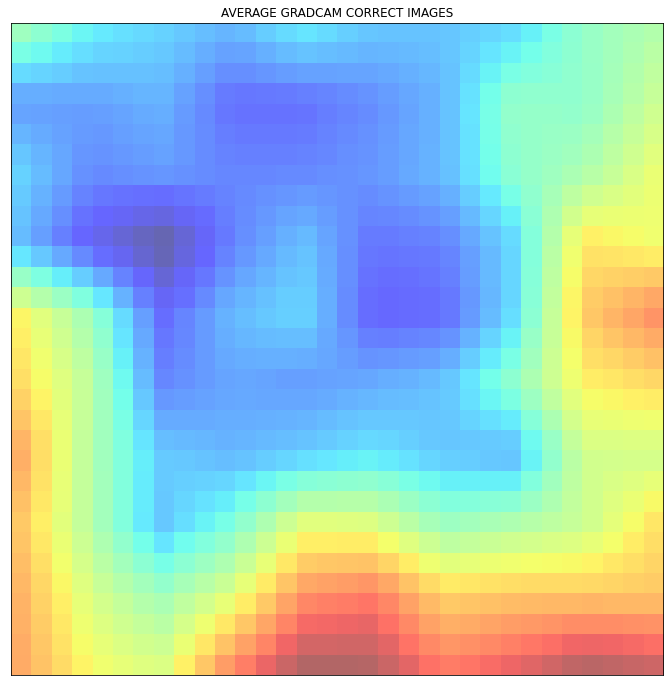

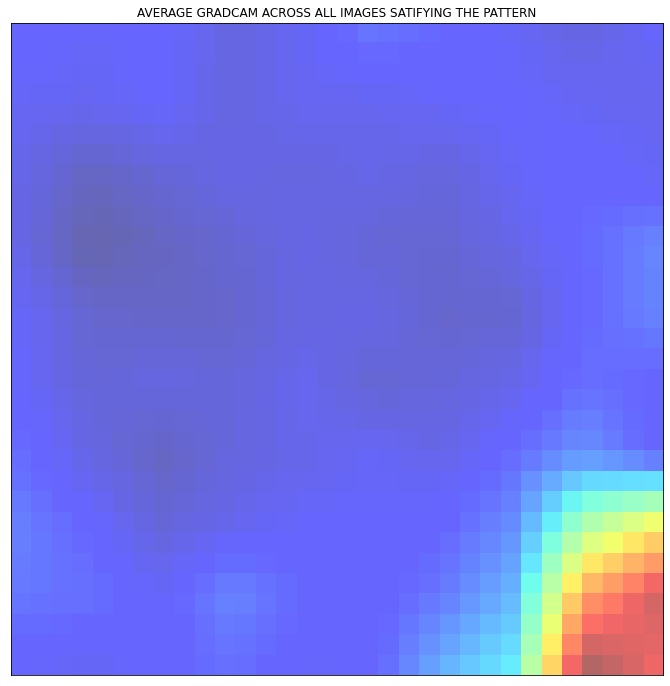

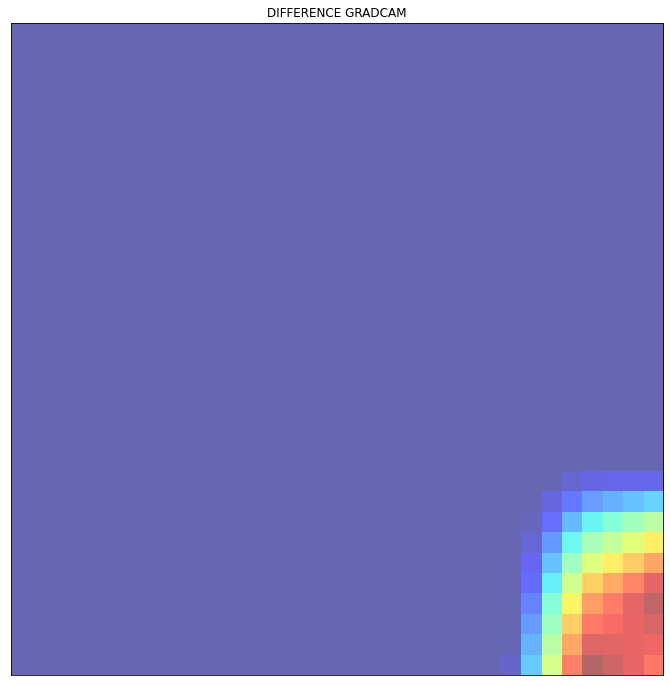

In [ ]:
REPAIR = False
VAL = True
start_time = time.time()


#REM = [[] for i in range(len(invs_sel_neus[indx])]

x = gen_data #gen_data
cnt = 0
correct = 0

labels = actuals_gen #actuals_gen
ideals = gen_labels #gen_labels

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0



sum_pat = [ np.zeros((1,32,32),dtype=float) for i in range(len(invs_sel_neus)) ]
cnt_pat = [ np.zeros((1),dtype=int) for i in range(len(invs_sel_neus)) ]
REM2 = [[] for i in range(len(invs_sel_neus))]
REM5 = [[] for i in range(len(invs_sel_neus))]
REM10 = [[] for i in range(len(invs_sel_neus))]

diff_pat = [ np.zeros((1,32,32),dtype=float) for i in range(len(invs_sel_neus)) ]
sum_pat_corr = np.zeros((1,32,32),dtype=float)
cnt_pat_corr = np.zeros((1),dtype=int)

#print(np.shape(sum_pat), np.shape(cnt_pat), np.shape(REM))

for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        model1 = Model(model.inputs,model.outputs)
        gradcam = GradcamPlusPlus(model1,model_modifier=model_modifier_act5_layer,clone=True)

        img = np.zeros((32,32,3),dtype=float)
        for ix in range(0,32):
            for iy in range(0,32):
              for iz in range(0,3):
                img[ix][iy][iz] = (float(image[ix][iy][iz]))

        img_mod = np.expand_dims(img,axis=0)

        loss_fn = loss_gen_sum1(inc_neuron_ids[match])

        cam = gradcam(loss_fn,img_mod,penultimate_layer=-1)

        cam = normalize(cam)
        sum_pat[match] = sum_pat[match] + cam
        cnt_pat[match] = cnt_pat[match] + 1


        cnt = cnt + 1


    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
          model1 = Model(model.inputs,model.outputs)
          gradcam = GradcamPlusPlus(model1,model_modifier=model_modifier_layer,clone=True)


          img = np.zeros((32,32,3),dtype=float)
          for ix in range(0,32):
            for iy in range(0,32):
              for iz in range(0,3):
                img[ix][iy][iz] = (float(image[ix][iy][iz]))

          img_mod = np.expand_dims(img,axis=0)

          loss_fn = loss_gen_sum1(inc_neuron_ids[match])
          print(inc_neuron_ids[match])
          cam = gradcam(loss_fn,img_mod,penultimate_layer=-1)

          cam = normalize(cam)
          sum_pat_corr = sum_pat_corr + cam
          cnt_pat_corr = cnt_pat_corr + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('TOTAL CNT:',cnt)


print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

avg_pat_corr = sum_pat_corr/cnt_pat_corr
subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
f_cor, ax_cor = plt.subplots(**subplot_args)
ax_cor.set_title('AVERAGE GRADCAM CORRECT IMAGES')
avg_pat1_cor = avg_pat_corr.reshape(32,32)
ax_cor.imshow(avg_pat1_cor, cmap='jet', alpha=0.6)

for index in range(0, len(invs_sel_neus) ):
  print("PATTERN:" , index, ",MATCHES #:", cnt_pat[index])
  if (cnt_pat[index] == 0):
    continue


  avg_pat = sum_pat[index]/cnt_pat[index]
  subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
  f, ax = plt.subplots(**subplot_args)
  ax.set_title('AVERAGE GRADCAM ACROSS ALL IMAGES SATIFYING THE PATTERN')
  avg_pat1 = avg_pat.reshape(32,32)
  ax.imshow(avg_pat1, cmap='jet', alpha=0.6)
  vals = []
  for ix in range(0,32):
    for iy in range(0,32):
      if (avg_pat[0][ix][iy] not in vals):
        vals.append(avg_pat[0][ix][iy])

  vals.sort(reverse=True)
  top_2_percent = int((2/100)*(len(vals)))
  top_5_percent = int((5/100)*(len(vals)))
  top_10_percent = int((10/100)*(len(vals)))

  threshold2 = vals[top_2_percent]
  threshold5 = vals[top_5_percent]
  threshold10 = vals[top_10_percent]

  print("LEN VALS=",len(vals), ",top 5%=",top_5_percent)
  print("MAX=",vals[0],",Threshold=",threshold2)
  print("MAX=",vals[0],",Threshold=",threshold5)
  print("MAX=",vals[0],",Threshold=",threshold10)

  rem_pixels = []
  for ix in range(0,32):
    for iy in range(0,32):
      if (avg_pat[0][ix][iy] >= threshold2):
            min_x = ix-1
            max_x = ix+1
            if (min_x < 0):
              min_x = 0
            if (max_x > 31):
              max_x = 31

            min_y = iy-1
            max_y = iy+1
            if (min_y < 0):
              min_y = 0
            if (max_y > 31):
              max_y = 31

            for i_x in range(min_x,max_x+1):
              for i_y in range(min_y,max_y+1):
                #print("REM:",i_x,",",i_y)
                rem_pixels.append((i_x,i_y))

  REM2[index] = rem_pixels

  rem_pixels = []
  for ix in range(0,32):
    for iy in range(0,32):
      if (avg_pat[0][ix][iy] >= threshold5):
            min_x = ix-1
            max_x = ix+1
            if (min_x < 0):
              min_x = 0
            if (max_x > 31):
              max_x = 31

            min_y = iy-1
            max_y = iy+1
            if (min_y < 0):
              min_y = 0
            if (max_y > 31):
              max_y = 31

            for i_x in range(min_x,max_x+1):
              for i_y in range(min_y,max_y+1):
                #print("REM:",i_x,",",i_y)
                rem_pixels.append((i_x,i_y))

  REM5[index] = rem_pixels

  rem_pixels = []
  for ix in range(0,32):
    for iy in range(0,32):
      if (avg_pat[0][ix][iy] >= threshold10):
            min_x = ix-1
            max_x = ix+1
            if (min_x < 0):
              min_x = 0
            if (max_x > 31):
              max_x = 31

            min_y = iy-1
            max_y = iy+1
            if (min_y < 0):
              min_y = 0
            if (max_y > 31):
              max_y = 31

            for i_x in range(min_x,max_x+1):
              for i_y in range(min_y,max_y+1):
                #print("REM:",i_x,",",i_y)
                rem_pixels.append((i_x,i_y))

  REM10[index] = rem_pixels

  diff_pat[index] = avg_pat - avg_pat_corr
  for ix in range(0,32):
    for iy in range(0,32):
      if (diff_pat[index][0][ix][iy] < 0.0):
        diff_pat[index][0][ix][iy] = 0.0

  subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
  f, ax = plt.subplots(**subplot_args)
  ax.set_title('DIFFERENCE GRADCAM')
  diff_pat1 = diff_pat[index].reshape(32,32)
  ax.imshow(diff_pat1, cmap='jet', alpha=0.6)
  #print("REM MATCH:")
  #print(REM[index])
print("--- %s seconds ---" % (time.time() - start_time))






In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(gen_data)
cnt = 0
correct = 0

labels = actuals_gen
ideals = gen_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM2), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM2[match])):
                    (rem_ix,rem_iy) = REM2[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(gen_data)
cnt = 0
correct = 0

labels = actuals_gen
ideals = gen_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM5), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM5[match])):
                    (rem_ix,rem_iy) = REM5[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(gen_data)
cnt = 0
correct = 0

labels = actuals_gen
ideals = gen_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM10), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM10[match])):
                    (rem_ix,rem_iy) = REM10[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(val_data)
cnt = 0
correct = 0

labels = actuals_val
ideals = val_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM2), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM2[match])):
                    (rem_ix,rem_iy) = REM2[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(val_data)
cnt = 0
correct = 0

labels = actuals_val
ideals = val_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM5), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM5[match])):
                    (rem_ix,rem_iy) = REM5[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(val_data)
cnt = 0
correct = 0

labels = actuals_val
ideals = val_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if ( cnt == 100):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0] = image
        label = (model.predict(image_array)).argmax(axis=1)

        print(np.shape(REM10), match)
        for ix in range(0,32):
            for iy in range(0,32):
                fnd = 0
                for rem in range(0,len(REM10[match])):
                    (rem_ix,rem_iy) = REM10[match][rem]
                    if (rem_ix == ix and rem_iy == iy):
                      image[ix][iy][0]=0.0
                      image[ix][iy][1]=0.0
                      image[ix][iy][2]=0.0
                      fnd = 1
                      break

        if (cnt == 100):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array = np.zeros((1,32,32,3),dtype=float)
        image_array[0]=image
        new_label = (model.predict(image_array)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", label, ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != label) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1
    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

In [ ]:
import copy
wrongsolve=0
x = copy.deepcopy(val_data)
cnt = 0
correct = 0

labels = actuals_val
ideals = val_labels

start_time = time.time()

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
ss=""
for inp_cnt in range(0,len(x)): # x is the list of images in the dataset used to extract the mis-classification pattern

    image = x[inp_cnt]
    label = labels[inp_cnt]

    inp = image

    if (VAL == False):
        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(Ainvs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(Ainvs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(Ainvs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(Ainvs_sel_neus[indx])

        for indx in range (0, len(Ainvs_sel_sig)):
          neuron_sig.append(Ainvs_sel_sig[indx])

        layer_vals = []
        suff = inc_suff

    else:

        inc_layer = 'activation_5'  #layer name, get it from the model summary
        inc_suff = fingerprint_suffix_vals(inp, inc_layer)

        neuron_ids =[]
        inc_neuron_ids=[]
        neuron_sig = []

        for indx in range (0, len(invs_sel_neus)):
          neu_ids = []
          for indx1 in range (0, len(invs_sel_neus[indx])):
              neu_ids.append(-1)
              neu_ids.append(invs_sel_neus[indx][indx1])
          neuron_ids.append(neu_ids)
          inc_neuron_ids.append(invs_sel_neus[indx])

        for indx in range (0, len(invs_sel_sig)):
          neuron_sig.append(invs_sel_sig[indx])

        layer_vals = inc_suff[0]
        suff = []

    image_array = np.zeros((1,32,32,3),dtype=float)
    image_array[0]=image

    match = check_pattern_inter(layer_vals,suff,neuron_ids,neuron_sig,VAL,False)
    if (match >= 0):


        print("IDENTIFIED POISONED INPUT", inp_cnt,",", cnt, ",ACTUAL:", labels[inp_cnt], ",IDEAL:", ideals[inp_cnt])

        if (labels[inp_cnt] == ideals[inp_cnt]):
          false_positives = false_positives + 1
        else:
          true_positives = true_positives + 1

        if (labels[inp_cnt] == 7):
                print("BEFORE REPAIR",img.shape,image.shape)
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)
                ss=""
                for i in range(0,32):
                  for j in range(0,32):
                    for k in range(0,3):
                      ss=ss+str(image[i][j][k])+","


        #image_array = np.zeros((1,32,32,3),dtype=float)
        #image_array[0] = image
        #label = (model.predict(image_array)).argmax(axis=1)

        #print(np.shape(REM10), match)
        #for ix in range(0,32):
        #    for iy in range(0,32):
        #        fnd = 0
        #        for rem in range(0,len(REM10[match])):
        #            (rem_ix,rem_iy) = REM10[match][rem]
        #            if (rem_ix == ix and rem_iy == iy):
        #              image[ix][iy][0]=0.0
        #              image[ix][iy][1]=0.0
        #              image[ix][iy][2]=0.0
        #              fnd = 1
        #              break


        image_rep = np.zeros((32,32,3),dtype=float)

        for ix in range(0,32):
            for iy in range(0,32):
                image_rep[ix][iy][0] = image[ix][iy][0]
                image_rep[ix][iy][1] = image[ix][iy][1]
                image_rep[ix][iy][2] = image[ix][iy][2]

                if (diff_pat[match][0][ix][iy] > 0.0):
                   image_rep[ix][iy][0] = 0.0
                   image_rep[ix][iy][1] = 0.0
                   image_rep[ix][iy][2] = 0.0


        if (labels[inp_cnt] == 7):
                print("AFTER REPAIR")
                subplot_args = { 'nrows': 1, 'ncols': 1, 'figsize': (12, 12),'subplot_kw': {'xticks': [], 'yticks': []} }
                f, ax = plt.subplots(**subplot_args)
                ax.set_title('REPAIRED IMAGE')
                norm_img = np.zeros((32,32,3),dtype=float)
                for ix in range(0,32):
                  for iy in range(0,32):
                    for iz in range(0,3):
                      norm_img[ix][iy][iz] = (image_rep[ix][iy][iz])
                img1 = norm_img.reshape(32,32,3)
                ax.imshow(img1)

        image_array_rep = np.zeros((1,32,32,3),dtype=float)
        image_array_rep[0]=image_rep
        new_label = (model.predict(image_array_rep)).argmax(axis=1)
        if (labels[inp_cnt] == ideals[inp_cnt] and new_label != ideals[inp_cnt]):
          wrongsolve=wrongsolve+1
        print("OLD LABEL:", labels[inp_cnt], ",REPAIRED LABEL:", new_label, ",CORRECT LABEL:", ideals[inp_cnt])
        if ((ideals[inp_cnt] != labels[inp_cnt]) and (ideals[inp_cnt] == new_label)):
            correct = correct + 1
        cnt = cnt + 1

    else:
      if (labels[inp_cnt] == ideals[inp_cnt]):
          true_negatives = true_negatives + 1
      else:
        if (labels[inp_cnt] == 7):
          false_negatives = false_negatives + 1

print('CNT:',cnt)

print('TP:', true_positives, ',FP:', false_positives, ",TN:", true_negatives, ",FN:", false_negatives)
PREC = ((true_positives)/ (true_positives + false_positives))
RECALL = ((true_positives)/ (true_positives + false_negatives))
print("PRECISION:" , PREC * 100.0, ",RECALL:", RECALL * 100.0)

print('CORRECT:', correct)
rep_rate = ((correct/true_positives) * 100.0)
print("REPAIR RATE:", rep_rate)
print(ss)
print("--- %s seconds ---" % (time.time() - start_time))


start_time = time.time()

test_labels = (model.predict(x)).argmax(axis=1)
PASS = 0
FAIL = 0
for indx in range(0, len(x)):
  if (test_labels[indx] == ideals[indx]):
    PASS = PASS + 1
  else:
    FAIL = FAIL + 1
print("PASS:", PASS, ",FAIL:", FAIL,"," ,",TEST ACCURACY:", (PASS/(PASS+FAIL))*100.0)
print("--- %s seconds ---" % (time.time() - start_time))
print(wrongsolve)

IDENTIFIED POISONED INPUT 36 , 0 ,ACTUAL: 1 ,IDEAL: 1
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 743 , 1 ,ACTUAL: 7 ,IDEAL: 7
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [7] ,CORRECT LABEL: 7
IDENTIFIED POISONED INPUT 1684 , 2 ,ACTUAL: 9 ,IDEAL: 1
OLD LABEL: 9 ,REPAIRED LABEL: [9] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 1720 , 3 ,ACTUAL: 1 ,IDEAL: 1
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 2262 , 4 ,ACTUAL: 1 ,IDEAL: 1
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 2795 , 5 ,ACTUAL: 1 ,IDEAL: 8
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 8
IDENTIFIED POISONED INPUT 3603 , 6 ,ACTUAL: 1 ,IDEAL: 1
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 4880 , 7 ,ACTUAL: 1 ,IDEAL: 1
OLD LABEL: 1 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 5000 , 8 ,ACTUAL: 7 ,IDEAL: 8
BEFORE REPAIR (32, 32, 3) (32, 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:137: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Streaming output truncated to the last 5000 lines.
IDENTIFIED POISONED INPUT 7662 , 1519 ,ACTUAL: 7 ,IDEAL: 0
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [0] ,CORRECT LABEL: 0
IDENTIFIED POISONED INPUT 7664 , 1520 ,ACTUAL: 7 ,IDEAL: 1
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [1] ,CORRECT LABEL: 1
IDENTIFIED POISONED INPUT 7665 , 1521 ,ACTUAL: 7 ,IDEAL: 9
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [9] ,CORRECT LABEL: 9
IDENTIFIED POISONED INPUT 7666 , 1522 ,ACTUAL: 7 ,IDEAL: 3
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [7] ,CORRECT LABEL: 3
IDENTIFIED POISONED INPUT 7667 , 1523 ,ACTUAL: 7 ,IDEAL: 5
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: [5] ,CORRECT LABEL: 5
IDENTIFIED POISONED INPUT 7669 , 1524 ,ACTUAL: 7 ,IDEAL: 2
BEFORE REPAIR (32, 32, 3) (32, 32, 3)
AFTER REPAIR
OLD LABEL: 7 ,REPAIRED LABEL: